## Decision Tree Regression

In [60]:


# Create a DecisionTreeRegressor with a maximum depth of 3 and fit it to the training data
regtree = tree.DecisionTreeRegressor(max_depth = 3)
regtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [61]:
# Predicting values for the training and test datasets using a regression tree model.
y_train_regtree = regtree.predict(x_train)
y_test_regtree = regtree.predict(x_test)

# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
r2_regtree_train = r2_score(y_train, y_train_regtree)
r2_regtree_test = r2_score(y_test, y_test_regtree)

# Calculating the Mean Squared Error (MSE) for the training and test datasets.
mse_regtree_train = mean_squared_error(y_train, y_train_regtree)
mse_regtree_test = mean_squared_error(y_test, y_test_regtree)


In [62]:
# Print the results
print("Decision Tree Regression:")
print(f"R-squared (R^2) - Train: {r2_regtree_train:.4f}, Test: {r2_regtree_test:.4f}")
print(f"Mean Squared Error (MSE) - Train: {mse_regtree_train:.4f}, Test: {mse_regtree_test:.4f}\n")

Decision Tree Regression:
R-squared (R^2) - Train: 0.6137, Test: 0.5928
Mean Squared Error (MSE) - Train: 62125086.3121, Test: 60424631.0261



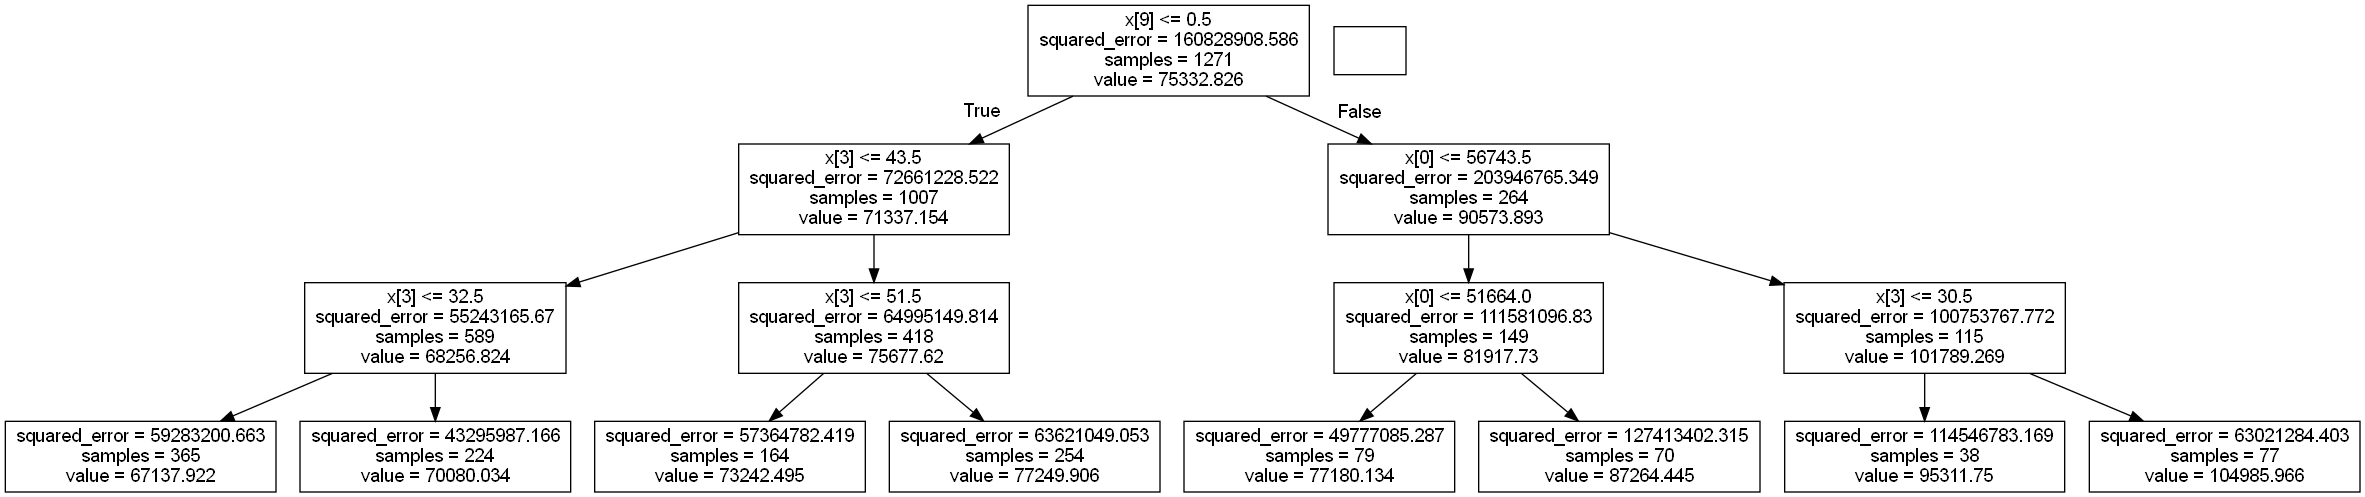

In [63]:
# Export the decision tree as a graphical visualization
dot_data = tree.export_graphviz(regtree, out_file = None)
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the decision tree as an image
Image(graph.create_png())

## Decision Tree Regression with GridSearchCV

In [64]:

# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [2, 3, 4, 5],  # List of possible maximum depths
    'min_samples_split': [2,4, 5,6, 10],  # List of possible values for minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4,6,8]  # List of possible values for minimum samples required at a leaf node
}

# Create a DecisionTreeRegressor
regtree_gs = tree.DecisionTreeRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(regtree_gs, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and corresponding mean squared error
print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best estimator (DecisionTreeRegressor) with the best hyperparameters
best_regtree = grid_search.best_estimator_

# Use the best estimator to make predictions
y_train_pred = best_regtree.predict(x_train)
y_test_pred = best_regtree.predict(x_test)

# Calculate the R-squared scores for training data
r2_train_dt = r2_score(y_train, y_train_pred)

# Calculate the R-squared scores for testing data
r2_test_dt = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error for training data
mse_train_dt = mean_squared_error(y_train, y_train_pred)

# Calculate the Mean Squared Error for testing data
mse_test_dt = mean_squared_error(y_test, y_test_pred)

# Print the results
print("R-squared (R2) for Training Data:", r2_train_dt)
print("R-squared (R2) for Testing Data:", r2_test_dt)
print("Mean Squared Error (MSE) for Training Data:", mse_train_dt)
print("Mean Squared Error (MSE) for Testing Data:", mse_test_dt)

Best Hyperparameters:  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4}
R-squared (R2) for Training Data: 0.6397831325660944
R-squared (R2) for Testing Data: 0.6032204390654172
Mean Squared Error (MSE) for Training Data: 57933285.64360235
Mean Squared Error (MSE) for Testing Data: 58875901.69009933


## RandomForest Regressor

In [65]:

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100,  300],  # Number of trees in the forest
    'max_depth': [20, 30],  # Maximum depth of the trees
    'min_samples_split': [5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [ 2, 4]  # Minimum samples required at a leaf node
}

# Create a RandomForestRegressor
rf_gs = RandomForestRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_gs, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and corresponding mean squared error
print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best estimator (RandomForestRegressor) with the best hyperparameters
best_rf = grid_search.best_estimator_

# Use the best estimator to make predictions
y_train_pred = best_rf.predict(x_train)
y_test_pred = best_rf.predict(x_test)

# Calculate the R-squared scores for training data
r2_train_rf = r2_score(y_train, y_train_pred)

# Calculate the R-squared scores for testing data
r2_test_rf = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error for training data
mse_train_rf = mean_squared_error(y_train, y_train_pred)

# Calculate the Mean Squared Error for testing data
mse_test_rf = mean_squared_error(y_test, y_test_pred)

# Print the results
print("R-squared (R2) for Training Data:", r2_train_rf)
print("R-squared (R2) for Testing Data:", r2_test_rf)
print("Mean Squared Error (MSE) for Training Data:", mse_train_rf)
print("Mean Squared Error (MSE) for Testing Data:", mse_test_rf)


Best Hyperparameters:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
R-squared (R2) for Training Data: 0.8975425643103269
R-squared (R2) for Testing Data: 0.6468183616223173
Mean Squared Error (MSE) for Training Data: 16478117.558473205
Mean Squared Error (MSE) for Testing Data: 52406649.60386141


In [66]:


# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Define the RandomForestRegressor with the best hyperparameters
best_rf = RandomForestRegressor(n_estimators=300, max_depth=30, min_samples_split=5, min_samples_leaf=2)

# Fit the model on the training data
best_rf.fit(x_train, y_train)

# Make predictions on training and testing sets
y_train_pred = best_rf.predict(x_train)
y_test_pred = best_rf.predict(x_test)

# Calculate R-squared scores for training and testing data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate Mean Squared Error for training and testing data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the results
print("R-squared (R2) for Training Data:", r2_train)
print("R-squared (R2) for Testing Data:", r2_test)
print("Mean Squared Error (MSE) for Training Data:", mse_train)
print("Mean Squared Error (MSE) for Testing Data:", mse_test)

# Perform cross-validation to calculate training and validation scores
cv_scores = cross_val_score(best_rf, x_train, y_train, cv=5, scoring='r2')
cv_mse = -cross_val_score(best_rf, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate mean R-squared and MSE for cross-validation
mean_cv_r2 = cv_scores.mean()
mean_cv_mse = cv_mse.mean()

# Print cross-validation results
print("Mean R-squared (R2) for Cross-Validation:", mean_cv_r2)
print("Mean Mean Squared Error (MSE) for Cross-Validation:", mean_cv_mse)


R-squared (R2) for Training Data: 0.8947187356637296
R-squared (R2) for Testing Data: 0.5923010131564919
Mean Squared Error (MSE) for Training Data: 17213260.854363352
Mean Squared Error (MSE) for Testing Data: 58499652.71332641
Mean R-squared (R2) for Cross-Validation: 0.5979157445273898
Mean Mean Squared Error (MSE) for Cross-Validation: 64579224.69908582
